In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
data=pd.read_csv('telecom_churn.csv')
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [3]:
data.shape

(243553, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [5]:
data.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [8]:
data.nunique()

customer_id             243553
telecom_partner              4
gender                       2
age                         57
state                       28
city                         6
pincode                 213442
date_of_registration      1220
num_dependents               5
estimated_salary        110032
calls_made                 119
sms_sent                    59
data_used                11837
churn                        2
dtype: int64

In [9]:
data['telecom_partner'].unique()

array(['Reliance Jio', 'Vodafone', 'BSNL', 'Airtel'], dtype=object)

In [10]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [11]:
data['age'].unique()

array([25, 55, 57, 46, 26, 36, 60, 53, 44, 56, 64, 70, 38, 22, 61, 59, 47,
       58, 66, 71, 48, 20, 29, 73, 31, 62, 52, 69, 33, 42, 40, 30, 35, 28,
       49, 43, 18, 72, 39, 50, 34, 24, 74, 32, 68, 27, 65, 23, 37, 63, 19,
       21, 67, 51, 41, 45, 54], dtype=int64)

In [12]:
data['state'].unique()

array(['Karnataka', 'Mizoram', 'Arunachal Pradesh', 'Tamil Nadu',
       'Tripura', 'Uttarakhand', 'Himachal Pradesh', 'Rajasthan',
       'Odisha', 'Uttar Pradesh', 'Chhattisgarh', 'Madhya Pradesh',
       'Manipur', 'Goa', 'West Bengal', 'Gujarat', 'Telangana',
       'Maharashtra', 'Haryana', 'Andhra Pradesh', 'Sikkim', 'Assam',
       'Jharkhand', 'Kerala', 'Punjab', 'Nagaland', 'Bihar', 'Meghalaya'],
      dtype=object)

In [13]:
data['city'].unique()

array(['Kolkata', 'Mumbai', 'Delhi', 'Chennai', 'Hyderabad', 'Bangalore'],
      dtype=object)

In [14]:
data['pincode'].unique()

array([755597, 125926, 423976, ..., 520218, 387744, 139086], dtype=int64)

In [15]:
data['date_of_registration'].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', ..., '2023-05-02',
       '2023-05-03', '2023-05-04'], dtype=object)

In [16]:
data['num_dependents'].unique()

array([4, 2, 0, 1, 3], dtype=int64)

In [17]:
data['estimated_salary'].unique()

array([124962, 130556, 148828, ...,  64686, 104748, 114273], dtype=int64)

In [18]:
data['calls_made'].unique()

array([ 44,  62,  49,  80,  78,  91,  36,  87,  34,  61,   7,  39,  40,
        50,  86,  88,  16,  60,  95,  94,  57,  79,  25,  43,  28,  99,
        20,   4,  65,  93,  89,  51,  46,  77,  69,  92, 102,   0,  75,
        96,  56,  31,  66,  32,  70,   3,  14,  33,  30,  42,  83,  -1,
        29, 105,  45,  59,  27,  55,  22,  90,  76,  71, 101,  21,  15,
        74,  98,  13,  52,  -3,  38,  73,  53,  68,   8,  10,  37,  85,
        81,  41,  18,  -5,  12,  17, -10,  47,  26,  24,  -9,   5,  11,
        19,  82,   2, 103,  -4, 107,  72,  97,  64,   6, 106,  67,  54,
         1,  35,  58,  84, 104,   9,  -6,  48,  23,  -2,  63,  -8, 100,
        -7, 108], dtype=int64)

In [19]:
data['sms_sent'].unique()

array([45, 39, 24, 25, 15, 13, 40, 12, 33,  7, 51,  4, 17, 20, 42, 28, -1,
       50, 10,  0,  8, 48,  5, 22, 29,  6, -2, 44, 27, 16, 30, 31, 36, 19,
       38,  9, 49, 11, 35, 18, -3, 43, 41, 26, -4, 52, 23,  3, 21,  1, 37,
       47, 34, 46, 32,  2, 14, 53, -5], dtype=int64)

In [20]:
data['data_used'].unique()

array([-361, 5973,  193, ..., -830, -808, -655], dtype=int64)

# Exploratory Data Analysis

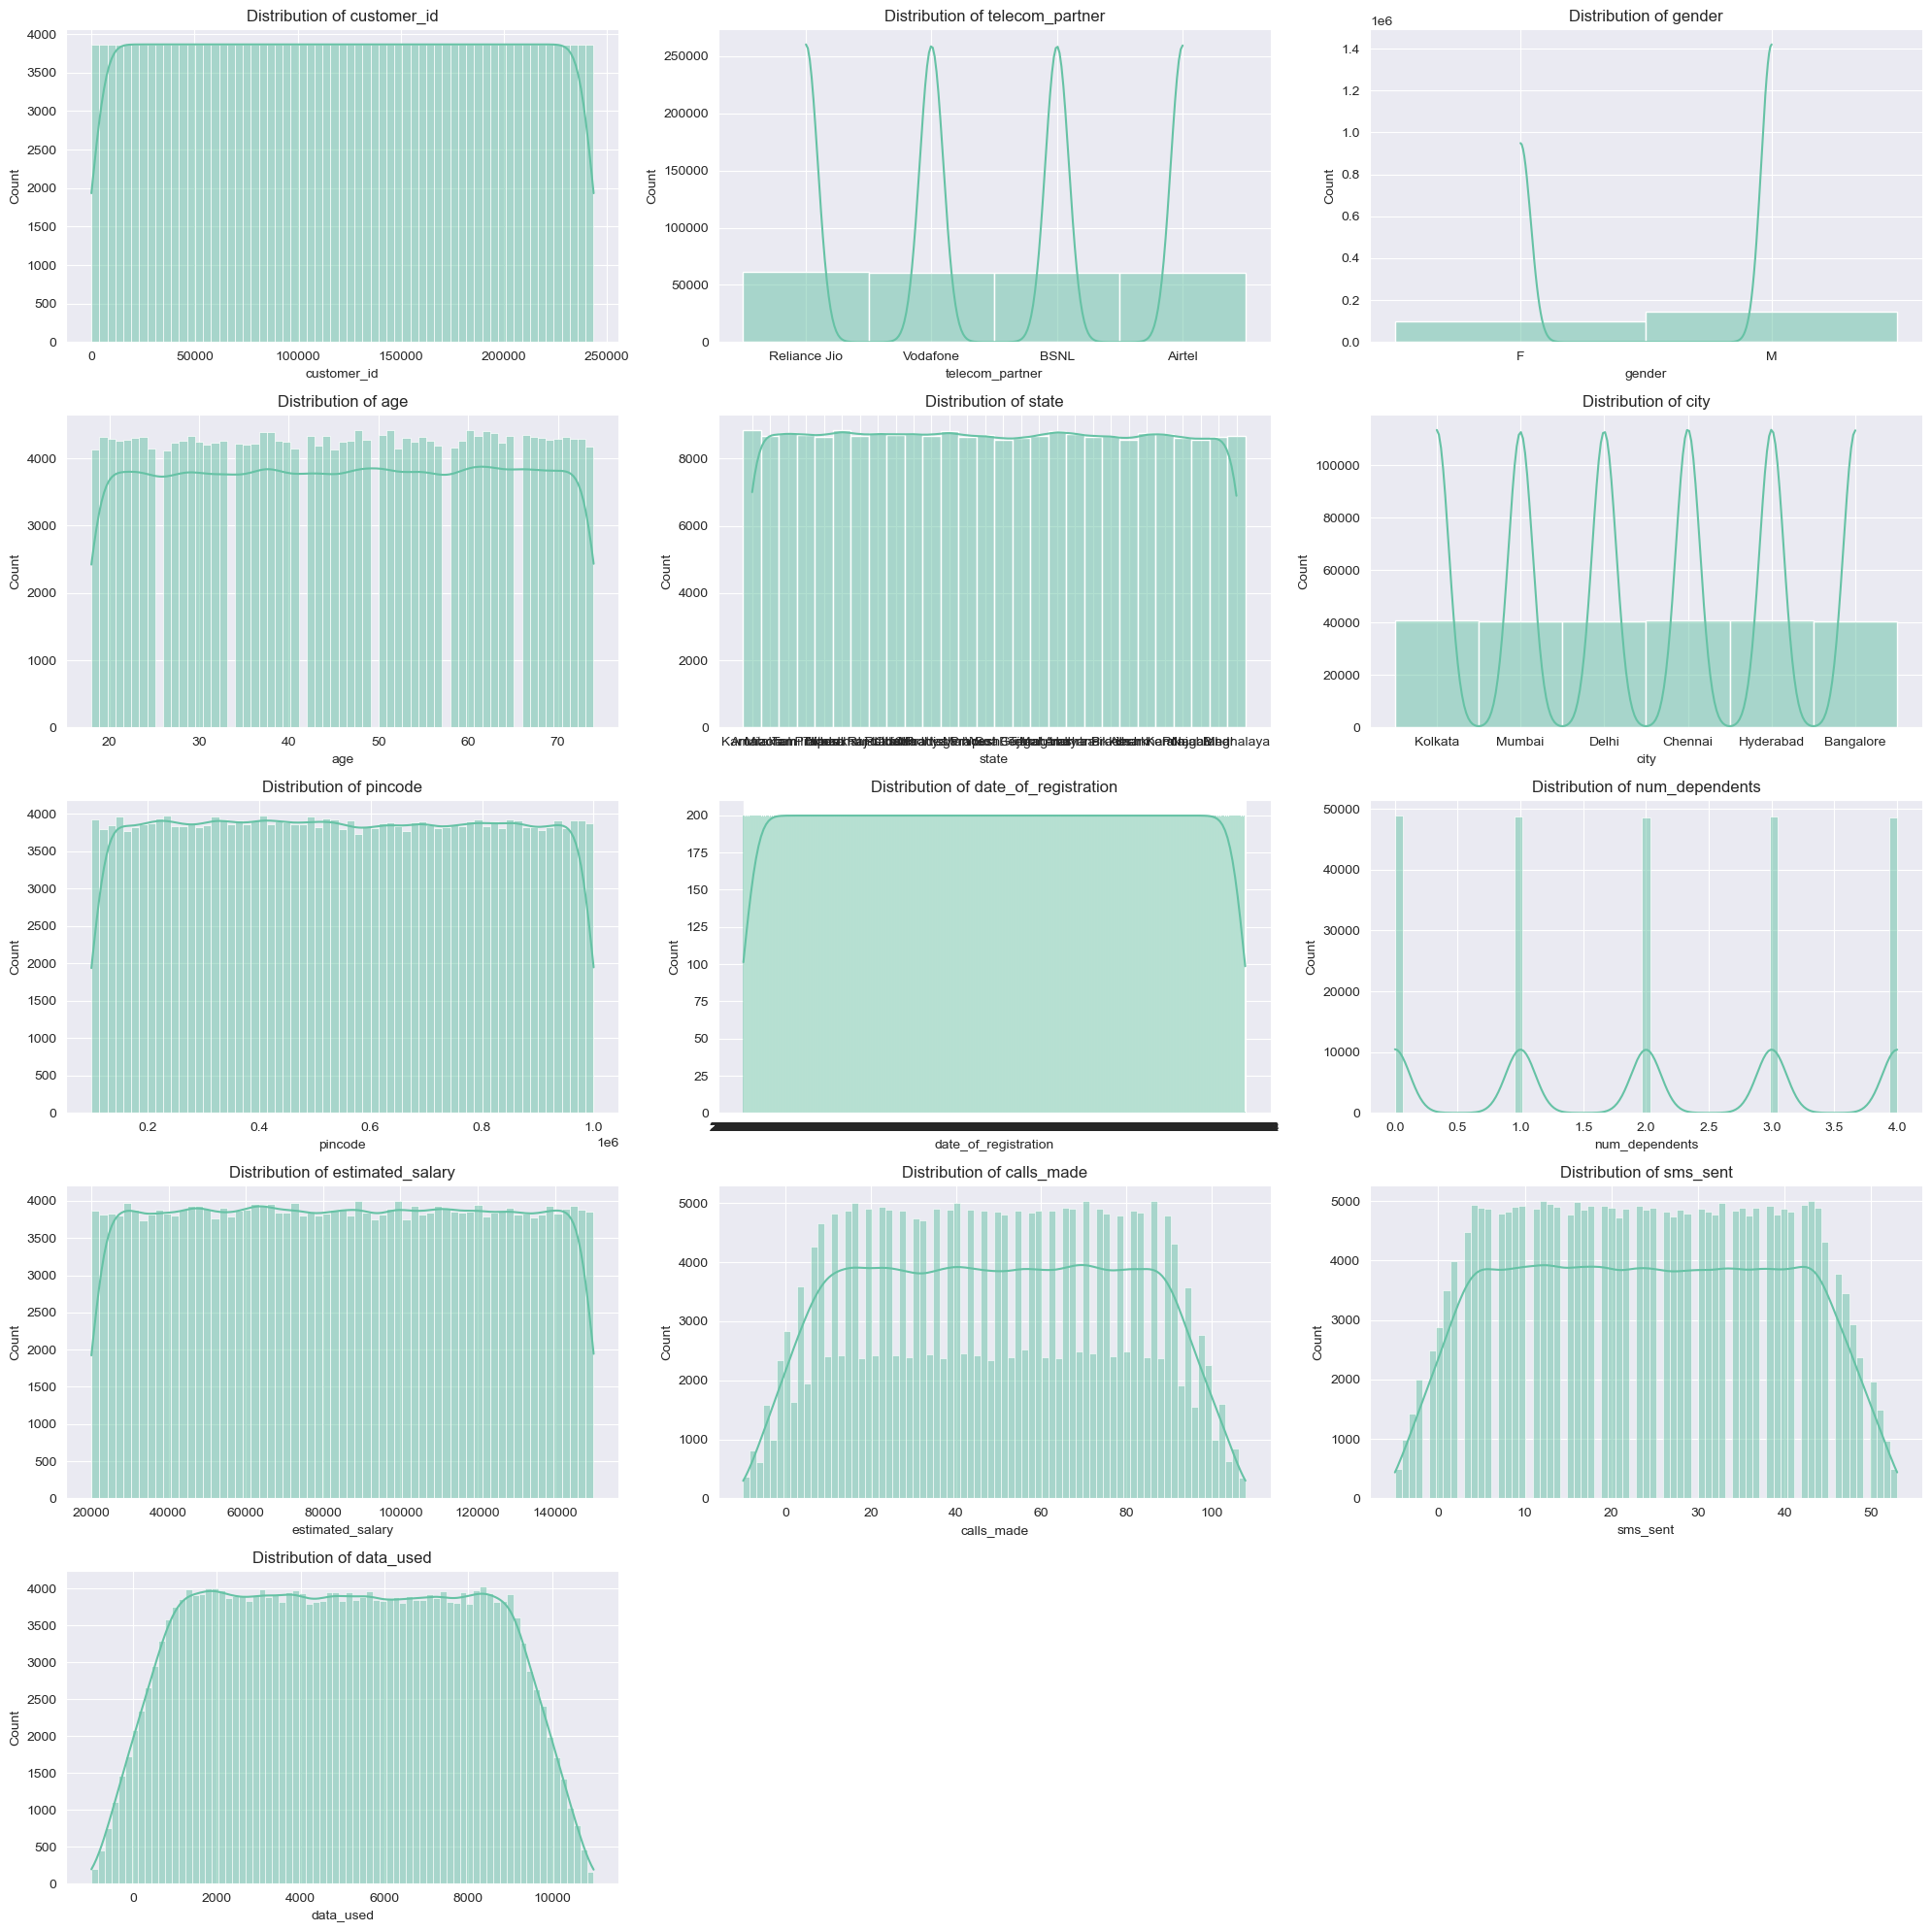

In [21]:
plt.figure(figsize=(20,20))
i = 1
for col in data.columns[:-1]:
    plt.subplot(5,3,i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    i += 1
plt.tight_layout()
plt.show()
    

# Churn Distribution by telecom_partner

In [22]:
churn_data=data[data['churn']==1]['telecom_partner']
non_churn_data=data[data['churn']==0]['telecom_partner']

churn_data

2             Vodafone
3                 BSNL
7                 BSNL
10              Airtel
16            Vodafone
              ...     
243523    Reliance Jio
243527            BSNL
243529    Reliance Jio
243533    Reliance Jio
243535            BSNL
Name: telecom_partner, Length: 48827, dtype: object

In [23]:
company_names=list(churn_data.value_counts().keys())
company_names

['Airtel', 'Reliance Jio', 'Vodafone', 'BSNL']

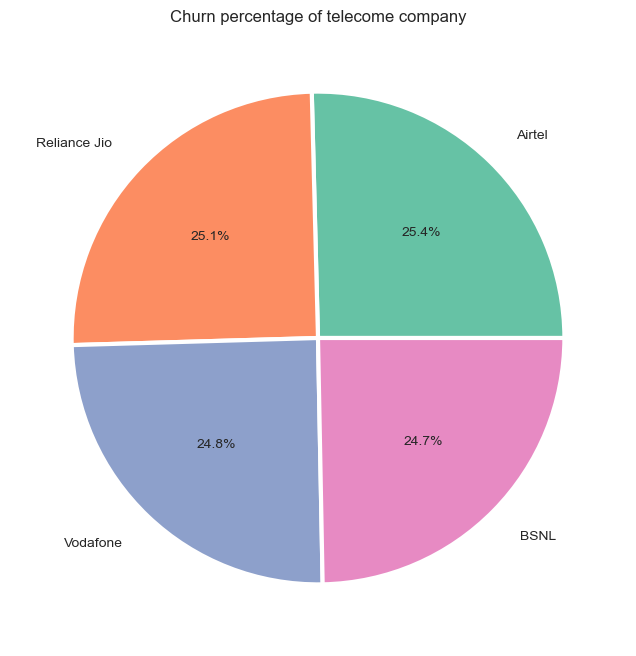

In [24]:
plt.figure(figsize=(10,8))
company_churn_values=list(churn_data.value_counts())
plt.pie(company_churn_values,labels=company_names,
       autopct='%.1f%%',labeldistance=1.15,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Churn percentage of telecome company")
plt.show()

# Churn Distribution by gender

In [25]:
churn_data_gender=data[data['churn']==1]['gender']
non_churn_data_gender=data[data['churn']==0]['gender']

In [26]:
gender_value=list(churn_data_gender.value_counts())
genders=['Male',"female"]

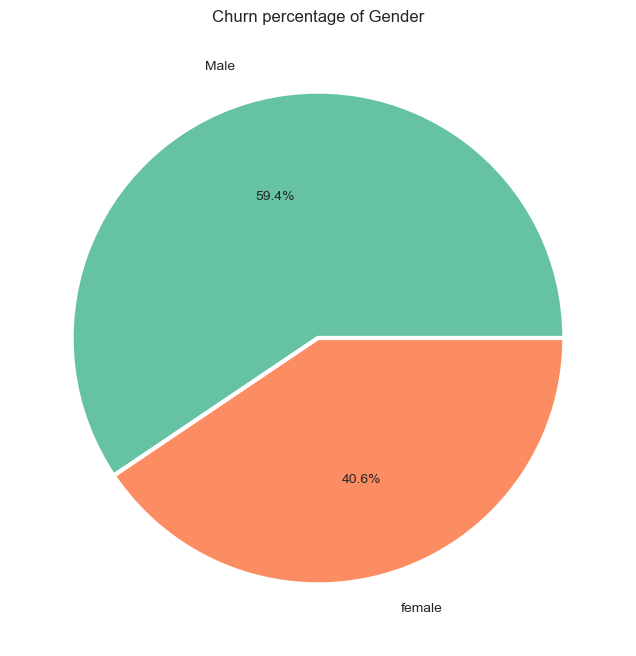

In [27]:
plt.figure(figsize=(10,8))
plt.pie(

gender_value,
autopct='%.1f%%',
labels=genders,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of Gender")
plt.show()

# Distribution of age by Churn

In [28]:
churn_age=data[data['churn']==1]['age']
nonchurn_age=data[data['churn']==0]['age']

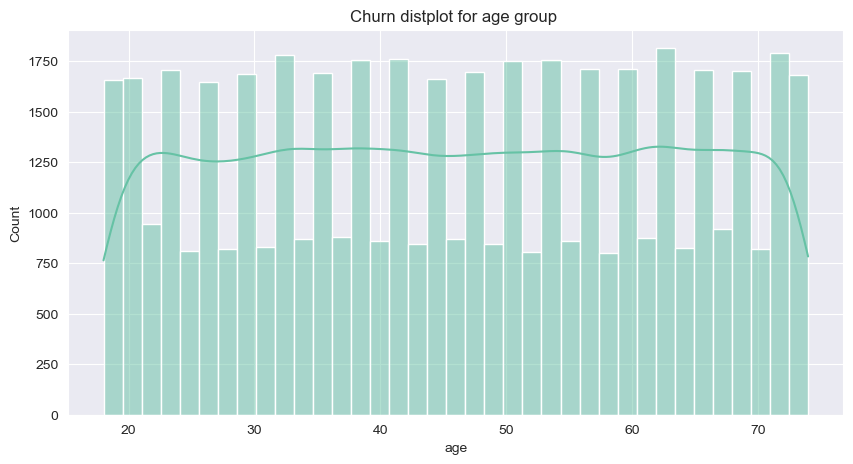

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(churn_age, kde=True)
plt.title("Churn distplot for age group ")
plt.show()

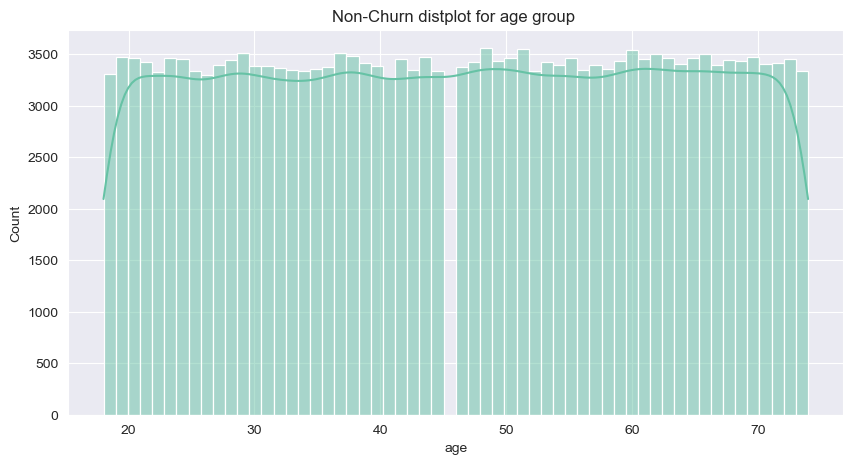

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(nonchurn_age, kde=True)
plt.title("Non-Churn distplot for age group ")
plt.show()

# Distribution of estimated_salary by Churn

In [31]:
churn_salary=data[data['churn']==1]['estimated_salary']
nonchurn_salary=data[data['churn']==0]['estimated_salary']

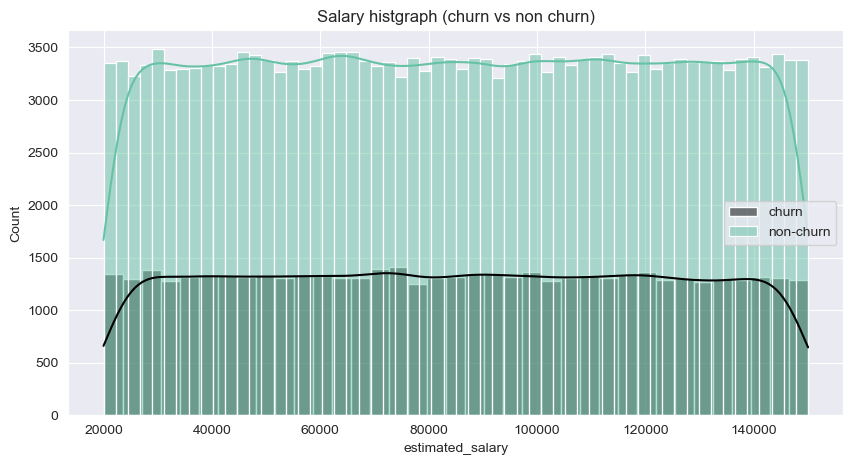

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(churn_salary,label="churn",color="black", kde=True)
sns.histplot(nonchurn_salary,label="non-churn", kde=True)
plt.title("Salary histgraph (churn vs non churn)")
plt.legend()
plt.show()

# Churn Distribution by state

In [33]:
churn_data_state=data[data['churn']==1]['state']
non_churn_data_state=data[data['churn']==0]['state']

In [34]:
churn_value_state=list(churn_data_state.value_counts())
churn_value_state_keys=list(churn_data_state.value_counts().keys())

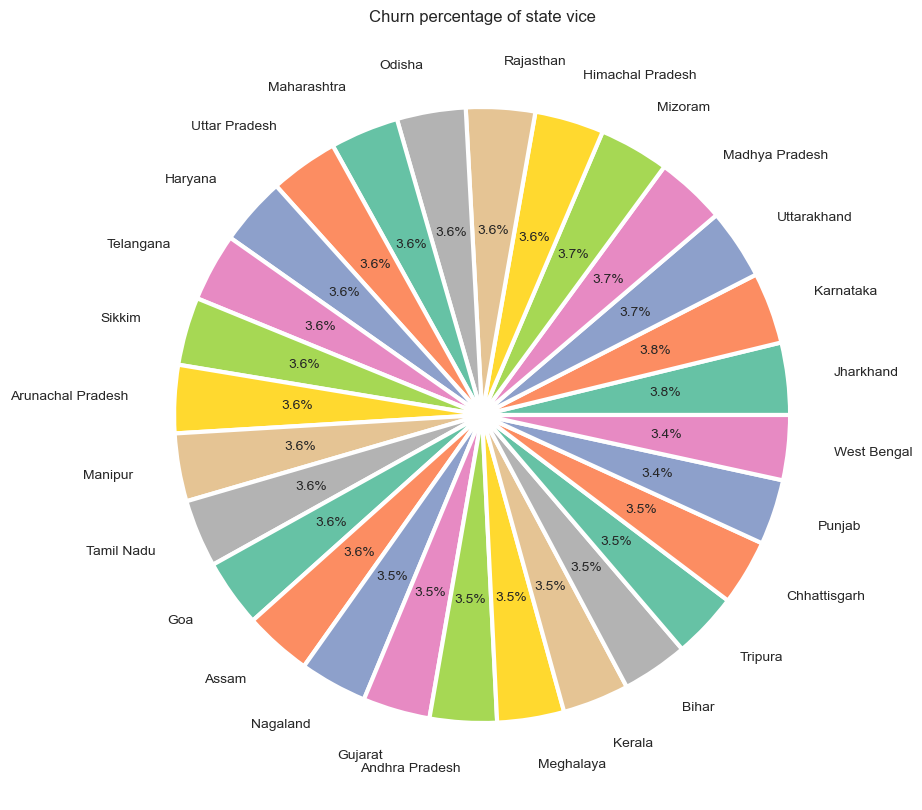

In [35]:
plt.figure(figsize=(20,10))
plt.pie(

churn_value_state,
autopct='%.1f%%',
labels=churn_value_state_keys,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of state vice")
plt.show()

# Distribution of calls_made by Churn

In [36]:
churn_data_calls_made=data[data['churn']==1]['calls_made']
non_churn_calls_made=data[data['churn']==0]['calls_made']

churn_value_calls_made=list(churn_data_calls_made.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_calls_made.value_counts().sort_values())

Text(0.5, 1.0, 'Histplot calls made churn customer')

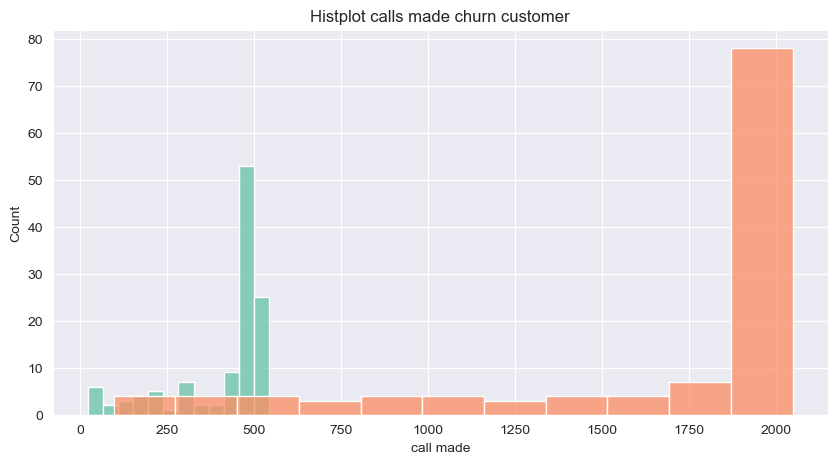

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(churn_value_calls_made)
sns.histplot(non_churn_value_calls_made)
plt.xlabel("call made")
plt.title("Histplot calls made churn customer")

# Distribution of data_used by Churn

In [38]:
churn_data_data_used=data[data['churn']==1]['data_used']
non_churn_data_used=data[data['churn']==0]['data_used']

Text(0.5, 1.0, 'scatterplot data usage made churn  and non-churn customer')

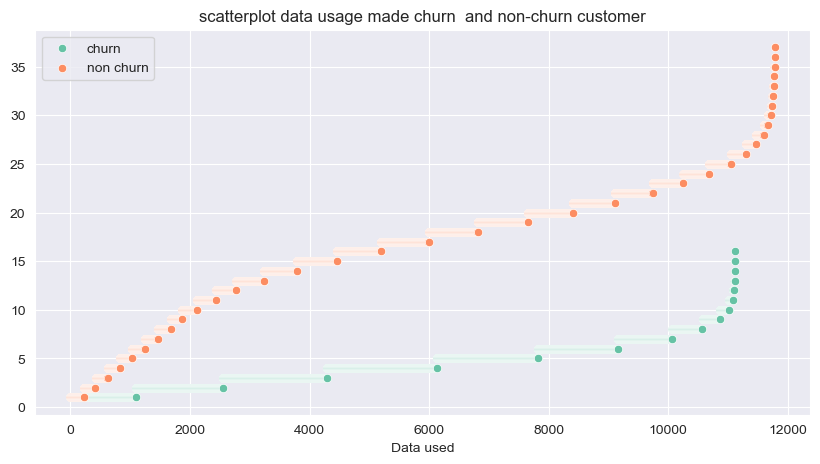

In [39]:
churn_value_calls_made=list(churn_data_data_used.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_data_used.value_counts().sort_values())
plt.figure(figsize=(10,5))
sns.scatterplot(churn_value_calls_made,label="churn")
sns.scatterplot(non_churn_value_calls_made,label="non churn")
plt.xlabel("Data used")
plt.title("scatterplot data usage made churn  and non-churn customer")

# Distribution of sms_sent by Churn

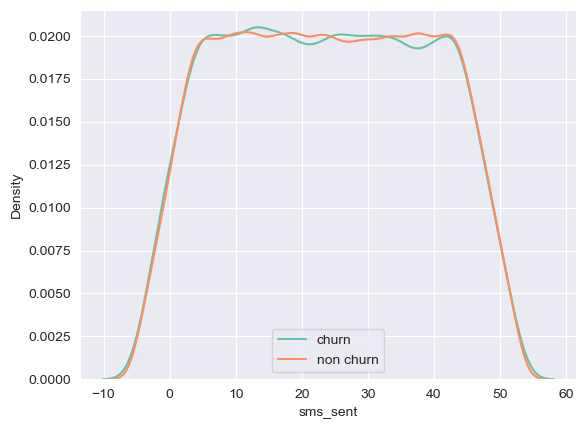

In [40]:
fig, ax = plt.subplots()
sns.kdeplot(data[data['churn'] == 1]['sms_sent'], label='churn', ax=ax)
sns.kdeplot(data[data['churn'] == 0]['sms_sent'], label='non churn', ax=ax)
ax.set_xlabel('sms_sent')
plt.legend()
plt.show()

# Correlation matrix

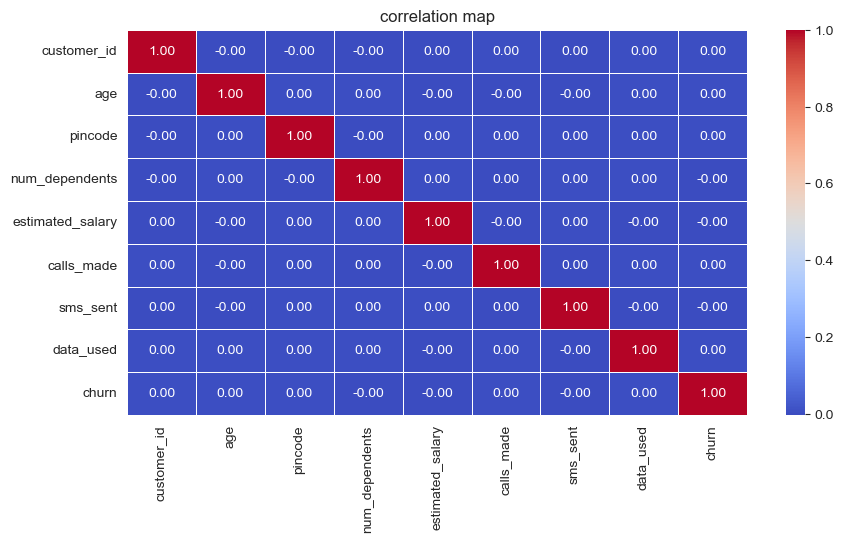

In [41]:
# Correlation matrix for numerical features

# Plotting the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("correlation map")
plt.show()

# Data Preprocessing

In [42]:
#Drop customer_id 
data.drop(columns=['customer_id'], inplace=True)

In [43]:
#Check for negative values in numeric columns
print("Negative values in columns:")
print((data[['calls_made', 'sms_sent', 'data_used']] < 0).sum())

Negative values in columns:
calls_made    6713
sms_sent      7375
data_used     6050
dtype: int64


In [44]:
# Convert negative values to positive
data[['calls_made', 'sms_sent', 'data_used']] = data[['calls_made', 'sms_sent', 'data_used']].abs()
   
# Display new feature
data[['calls_made', 'sms_sent', 'data_used']].head()

,calls_made,sms_sent,data_used
0,44,45,361
1,62,39,5973
2,49,24,193
3,80,25,9377
4,78,15,1393


In [45]:
# Convert pincode to Categorical
data['pincode'] = data['pincode'].astype(str)  # Convert to string (categorical)
# Convert date_of_registration to datetime format
data['date_of_registration'] = pd.to_datetime(data['date_of_registration'])

In [46]:
#Calculate customer lifrtime 
data['tenure_days'] = (pd.to_datetime("2025-02-12") - data['date_of_registration']).dt.days

data = data.drop('date_of_registration', axis=1)

data['tenure_days'].head()

0    1869
1    1869
2    1869
3    1869
4    1869
Name: tenure_days, dtype: int64

# Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encode Binary Categorical Features
le = LabelEncoder()
data["telecom_partner"] = le.fit_transform(data["telecom_partner"])
data["gender"] = le.fit_transform(data["gender"])
data["state"] = le.fit_transform(data["state"])
data["city"] = le.fit_transform(data["city"])
data["pincode"] = le.fit_transform(data["pincode"])
    
data[['telecom_partner', 'gender', 'state', 'city', 'pincode']].head()

,telecom_partner,gender,state,city,pincode
0,2,0,10,4,155514
1,2,0,16,5,6141
2,3,0,1,2,77059
3,1,1,22,4,100632
4,1,0,24,2,151894


In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features for scaling
num_features = [ 'telecom_partner',
                 'gender',
                 'age', 
                 'state', 
                 'city', 
                 'pincode', 
                 'num_dependents', 
                 'estimated_salary', 
                 'calls_made', 
                 'sms_sent', 
                 'data_used', 
                 'tenure_days'
               ]

# StandardScaler for certain models
std_scaler = StandardScaler()
data[num_features] = std_scaler.fit_transform(data[num_features])

# Select numerical features for scaling
minmax_features = ['telecom_partner',
                   'gender', 
                   'age', 
                   'state', 
                   'city', 
                   'pincode', 
                   'num_dependents', 
                   'estimated_salary', 
                   'calls_made', 
                   'sms_sent', 
                   'data_used', 
                   'tenure_days'
                  ]
# MinMaxScaler for certain models
minmax_scaler = MinMaxScaler()
data[minmax_features] = minmax_scaler.fit_transform(data[minmax_features])

In [49]:
data.head()

,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_days
0,0.666667,0.0,0.125000,0.370370,0.8,0.728604,1.00,0.807406,0.407407,0.849057,0.032845,0,1.0
1,0.666667,0.0,0.660714,0.592593,1.0,0.028771,0.50,0.850437,0.574074,0.735849,0.543445,0,1.0
2,1.000000,0.0,0.696429,0.037037,0.4,0.361032,0.00,0.990992,0.453704,0.452830,0.017560,1,1.0
3,0.333333,1.0,0.500000,0.814815,0.8,0.471475,0.25,0.144016,0.740741,0.471698,0.853153,1,1.0
4,0.333333,0.0,0.142857,0.888889,0.4,0.711644,0.50,0.269987,0.722222,0.283019,0.126740,0,1.0


In [50]:
# Save the processed data for further use or export
data.to_csv('Processed_Telecom_Churn.csv', index=False)